# Clustering K-Means

In [1]:
# import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
mt = pd.read_csv('test_cluster.csv', sep = ',', decimal = '.')
del mt['Unnamed: 0']
mt.dropna
mt.head()


,customerid,edad,bank_account_type_Current,bank_account_type_Other,bank_account_type_Savings,bank_name_clients_Access Bank,bank_name_clients_Diamond Bank,bank_name_clients_EcoBank,bank_name_clients_FCMB,bank_name_clients_Fidelity Bank,...,level_of_education_clients_UNKNOWN,loannumber,loanamount,totaldue,termdays,referredby,good_bad_flag,times_loaned,times_late,times_referred
0,8a858e135cb22031015cbafc76964ebd,48,0,0,1,0,0,0,0,0,...,1,2,10000.0,13000.0,30,1,1,1.0,0.0,1.0
1,8a858e275c7ea5ec015c82482d7c3996,36,0,0,1,0,0,0,0,0,...,1,2,10000.0,13000.0,30,0,0,1.0,1.0,0.0
2,8a858e5b5bd99460015bdc95cd485634,35,0,0,1,0,0,0,0,1,...,1,4,10000.0,13000.0,30,0,1,3.0,2.0,0.0
3,8a858efd5ca70688015cabd1f1e94b55,30,0,0,1,0,0,0,0,0,...,1,2,10000.0,11500.0,15,0,1,1.0,1.0,0.0
4,8a858ea05a859123015a8892914d15b7,31,0,0,1,1,0,0,0,0,...,1,6,20000.0,24500.0,30,0,1,5.0,2.0,0.0


In [3]:
mt_cl = mt.drop(['customerid'], axis=1)
mt_cl.head()


,edad,bank_account_type_Current,bank_account_type_Other,bank_account_type_Savings,bank_name_clients_Access Bank,bank_name_clients_Diamond Bank,bank_name_clients_EcoBank,bank_name_clients_FCMB,bank_name_clients_Fidelity Bank,bank_name_clients_First Bank,...,level_of_education_clients_UNKNOWN,loannumber,loanamount,totaldue,termdays,referredby,good_bad_flag,times_loaned,times_late,times_referred
0,48,0,0,1,0,0,0,0,0,0,...,1,2,10000.0,13000.0,30,1,1,1.0,0.0,1.0
1,36,0,0,1,0,0,0,0,0,0,...,1,2,10000.0,13000.0,30,0,0,1.0,1.0,0.0
2,35,0,0,1,0,0,0,0,1,0,...,1,4,10000.0,13000.0,30,0,1,3.0,2.0,0.0
3,30,0,0,1,0,0,0,0,0,0,...,1,2,10000.0,11500.0,15,0,1,1.0,1.0,0.0
4,31,0,0,1,1,0,0,0,0,0,...,1,6,20000.0,24500.0,30,0,1,5.0,2.0,0.0


In [4]:
mt_cl.shape

(3272, 89)

## Elbow method para determinar nº de clusters

In [5]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(mt_cl)
    distortions.append(kmeanModel.inertia_)

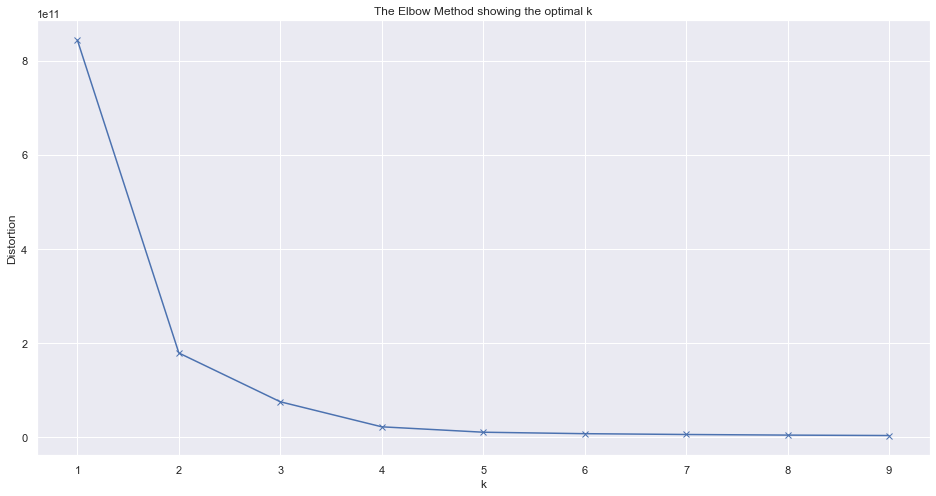

In [6]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Aplicando método de k-means

In [7]:
clustering =  KMeans(n_clusters = 2, max_iter = 300)#Crea el modelo
clustering.fit(mt_cl)

KMeans(n_clusters=2)

## Agregando la clasificación al archivo original

In [8]:
mt['Kmeans_Cluster']=clustering.labels_
mt.head()

,customerid,edad,bank_account_type_Current,bank_account_type_Other,bank_account_type_Savings,bank_name_clients_Access Bank,bank_name_clients_Diamond Bank,bank_name_clients_EcoBank,bank_name_clients_FCMB,bank_name_clients_Fidelity Bank,...,loannumber,loanamount,totaldue,termdays,referredby,good_bad_flag,times_loaned,times_late,times_referred,Kmeans_Cluster
0,8a858e135cb22031015cbafc76964ebd,48,0,0,1,0,0,0,0,0,...,2,10000.0,13000.0,30,1,1,1.0,0.0,1.0,0
1,8a858e275c7ea5ec015c82482d7c3996,36,0,0,1,0,0,0,0,0,...,2,10000.0,13000.0,30,0,0,1.0,1.0,0.0,0
2,8a858e5b5bd99460015bdc95cd485634,35,0,0,1,0,0,0,0,1,...,4,10000.0,13000.0,30,0,1,3.0,2.0,0.0,0
3,8a858efd5ca70688015cabd1f1e94b55,30,0,0,1,0,0,0,0,0,...,2,10000.0,11500.0,15,0,1,1.0,1.0,0.0,0
4,8a858ea05a859123015a8892914d15b7,31,0,0,1,1,0,0,0,0,...,6,20000.0,24500.0,30,0,1,5.0,2.0,0.0,0


In [9]:
mt.to_csv("mt_clusters.csv",sep=';',index=False)

## Visualización de clusters


In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_mt_cl = pca.fit_transform(mt_cl)
pca_mt_cl_df = pd.DataFrame(data=pca_mt_cl, columns = ['Componente_1', 'Componente_2'])
pca_nombres_mt = pd.concat([pca_mt_cl_df, mt[['Kmeans_Cluster']]], axis=1)

pca_nombres_mt

,Componente_1,Componente_2,Kmeans_Cluster
0,-11398.894399,-281.004836,0
1,-11398.894415,-281.002500,0
2,-11398.893613,-280.999042,0
3,-12513.798164,722.582834,0
4,3838.623875,-541.749417,0
...,...,...,...
3267,-12513.797785,722.582507,0
3268,-12513.797750,722.583279,0
3269,31712.232085,1278.138356,1
3270,3838.624366,-541.748571,0


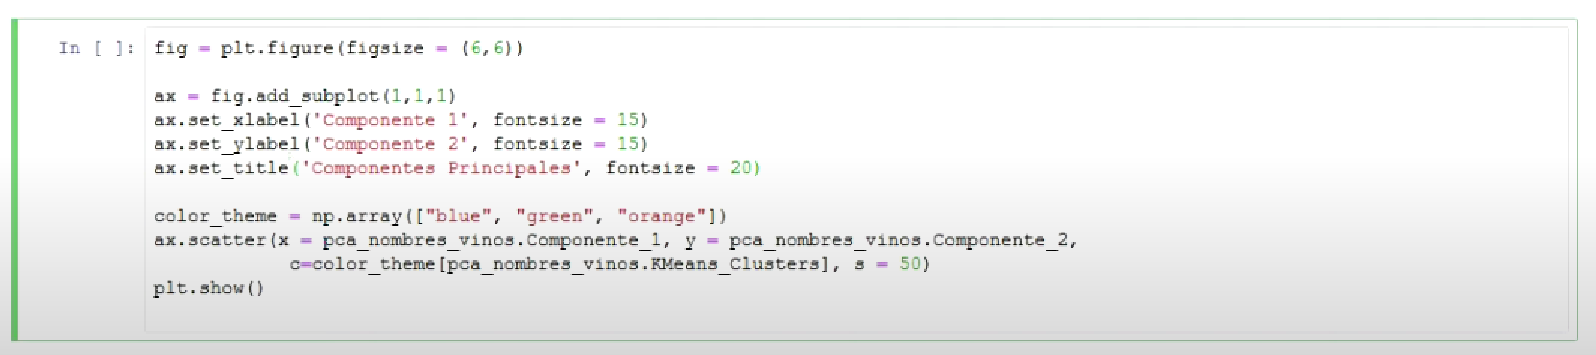

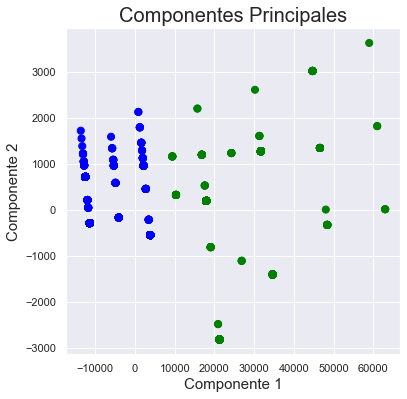

In [13]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes Principales', fontsize = 20)

color_theme = np.array(["blue", "green", "orange"])
ax.scatter(x = pca_nombres_mt.Componente_1, y = pca_nombres_mt.Componente_2,
          c=color_theme[pca_nombres_mt.Kmeans_Cluster], s = 50)
plt.show()
